### **Лабораторная работа №3**
### Метод именованных сущностей (NER)
#### *Выполнил: студент группы 8ПМ11, Кайдаров Алибек*

Цель работы: разработать программу на языке программирования Python, обрабатывающую тексты и извлекающую именованные сущности из текстов с обозначением класса сущностей (обязательно на русском языке!). Рекомендуется использовать платформу Anaconda 3 (Jupyter Notebook).
*Входные данные:* 10 текстов объемом 3-4 предложения каждое, не более. Все тексты должны быть на русском языке. Сбор данных – автоматизированный или ручной – по желанию студента. Исходные тексты, собранные вручную, должны храниться в файле формата по выбору студента (.csv, .json, .xlsx и т.д.)
*Выходные данные:* любая визуализация , а также статистические показатели, если актуально для вашего корпуса.

In [109]:
import stanza
import pandas as pd
from matplotlib import pyplot as plt
# stanza.download('ru')

In [110]:
def stanza_nlp_ru(data_frame, col):
    l = []
    nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')
    for ind in range(len(data_frame)):
        for sentence in nlp(data_frame[col][ind]).sentences:
            for entity in sentence.ents:
                l.append([ind + 1, entity.text, entity.type])
    return l

In [111]:
corp = pd.read_excel("D:\Spring_2022\BD_tools\\Lab_3.xlsx")
data = pd.DataFrame(stanza_nlp_ru(corp, "text"), columns=["Номер текста", "text", "Тип сущности"])

2022-06-17 19:54:05 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

2022-06-17 19:54:05 INFO: Use device: cpu
2022-06-17 19:54:05 INFO: Loading: tokenize
2022-06-17 19:54:05 INFO: Loading: ner
2022-06-17 19:54:07 INFO: Done loading processors!


In [112]:
data

,Номер текста,text,Тип сущности
0,1,Украине,LOC
1,1,России,LOC
2,1,Сильвио Берлускони,PER
3,1,Россия,LOC
4,1,Запада,LOC
...,...,...,...
62,10,Реджеп Тайип Эрдоган,PER
63,10,Североатлантического альянса,ORG
64,10,Йенсом Столтенбергом,PER
65,10,Andolu,ORG


In [113]:
agg_data = data.groupby(["Номер текста", "Тип сущности"])["text"].count().unstack().fillna(0)
agg_data

Тип сущности,LOC,MISC,ORG,PER
Номер текста,,,,
1,11.0,0.0,0.0,2.0
2,1.0,0.0,1.0,0.0
3,3.0,0.0,1.0,2.0
4,2.0,0.0,1.0,0.0
5,5.0,0.0,1.0,0.0
6,5.0,1.0,1.0,4.0
7,1.0,0.0,1.0,4.0
8,3.0,0.0,2.0,1.0
9,3.0,0.0,1.0,0.0


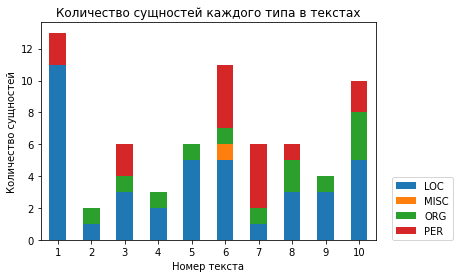

In [114]:
agg_data.plot(kind='bar', stacked=True)
plt.title("Количество сущностей каждого типа в текстах")
plt.xticks(rotation=0, ha='center')
plt.ylabel("Количество сущностей")
plt.legend(loc=(1.05,0))
plt.show()